In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('configuration_comparison.csv')
print("Configuration Comparison Data:")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")


Configuration Comparison Data:
     configuration problem  plan_length  expanded  evaluated  generated  \
0         astar-ff      pb           21     26327      64055     146763   
1       astar-hmax      pb           21    548360     995445    2933506   
2       lama-first      pb           22       458        540       2969   
3  eager-greedy-ff      pb           21       146        537        881   
4    seq-opt-lmcut      pb           21     48807     108860     264943   

   search_time  memory_mb  exit_code  
0     0.256567        NaN          0  
1     3.503490        NaN          0  
2     0.008715        NaN          0  
3     0.006166        NaN          0  
4     1.374834        NaN          0  

Dataset shape: (9, 9)

Columns: ['configuration', 'problem', 'plan_length', 'expanded', 'evaluated', 'generated', 'search_time', 'memory_mb', 'exit_code']


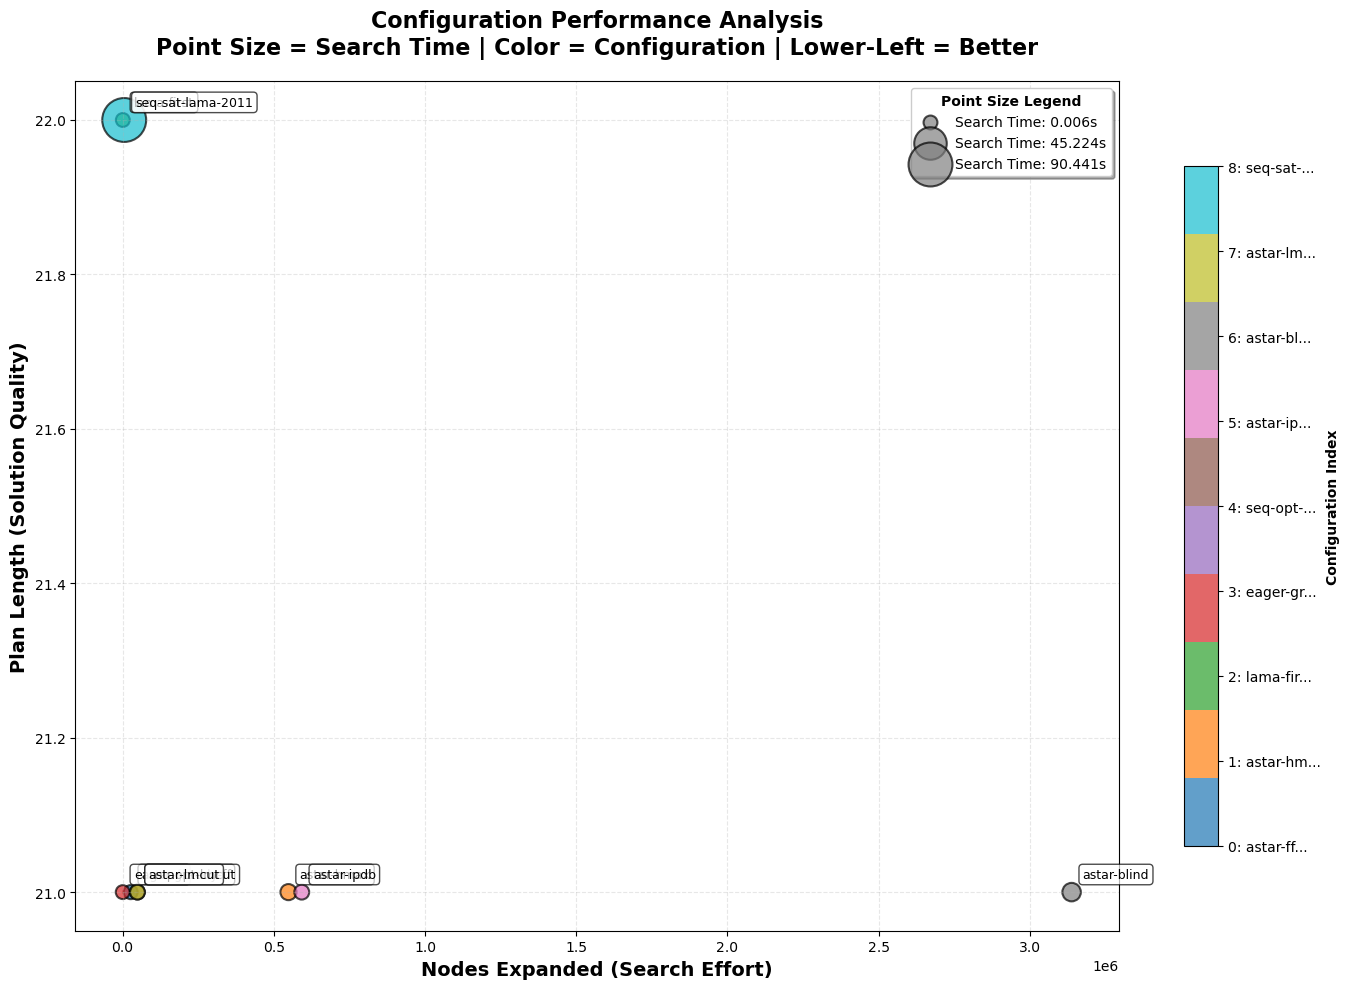


SCATTERPLOT ANALYSIS

📊 PLOT INTERPRETATION:
   • X-axis: Nodes Expanded (lower = more efficient search)
   • Y-axis: Plan Length (lower = better solution quality)
   • Point Size: Search Time (larger = slower)
   • Color: Different configurations
   • IDEAL: Bottom-left corner with small points

🎯 PERFORMANCE QUADRANTS:
   • Efficient & Optimal: ['astar-ff', 'eager-greedy-ff', 'seq-opt-lmcut', 'astar-lmcut']
   • Efficient & Suboptimal: ['lama-first', 'seq-sat-lama-2011']
   • Inefficient & Optimal: ['astar-hmax', 'astar-ipdb', 'astar-blind']
   • Inefficient & Suboptimal: None

⚡ TIME PERFORMANCE:
   • Fastest (smallest point): eager-greedy-ff (0.006s)
   • Slowest (largest point): seq-sat-lama-2011 (90.441s)
   • Speed ratio: 14667.8x difference

🏆 BEST OVERALL:
   • eager-greedy-ff: 146 nodes, 21 steps, 0.006s



In [33]:
# Create advanced scatterplot with search_time as point size
plt.figure(figsize=(14, 10))

# Normalize search_time for point sizes (scale between 100 and 1000 for visibility)
min_time = df['search_time'].min()
max_time = df['search_time'].max()
normalized_sizes = 100 + (df['search_time'] - min_time) / (max_time - min_time) * 900

# Create the scatterplot
scatter = plt.scatter(df['expanded'], df['plan_length'], 
                     s=normalized_sizes,  # Point size based on search_time
                     c=range(len(df)),    # Color based on configuration index
                     cmap='tab10',        # Discrete color map for configurations
                     alpha=0.7,           # Transparency for better visualization
                     edgecolors='black',  # Black borders for better definition
                     linewidth=1.5)

# Add configuration labels for each point
for i, row in df.iterrows():
    plt.annotate(row['configuration'], 
                (row['expanded'], row['plan_length']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=9, ha='left', va='bottom',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

# Customize the plot
plt.xlabel('Nodes Expanded (Search Effort)', fontsize=14, fontweight='bold')
plt.ylabel('Plan Length (Solution Quality)', fontsize=14, fontweight='bold')
plt.title('Configuration Performance Analysis\n' + 
          'Point Size = Search Time | Color = Configuration | Lower-Left = Better', 
          fontsize=16, fontweight='bold', pad=20)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Create custom legend for point sizes
size_legend_values = [min_time, (min_time + max_time) / 2, max_time]
size_legend_sizes = [100, 550, 1000]
size_legend_labels = [f'{val:.3f}s' for val in size_legend_values]

legend_elements = []
for size, label in zip(size_legend_sizes, size_legend_labels):
    legend_elements.append(plt.scatter([], [], s=size, c='gray', alpha=0.7, 
                                     edgecolors='black', linewidth=1.5, 
                                     label=f'Search Time: {label}'))

# Add the size legend
size_legend = plt.legend(handles=legend_elements, 
                        title="Point Size Legend", 
                        loc='upper right',
                        bbox_to_anchor=(1.0, 1.0),
                        frameon=True,
                        fancybox=True,
                        shadow=True)
size_legend.get_title().set_fontweight('bold')

# Add colorbar for configurations
cbar = plt.colorbar(scatter, ax=plt.gca(), shrink=0.8, aspect=20)
cbar.set_label('Configuration Index', fontweight='bold')
cbar.set_ticks(range(len(df)))
cbar.set_ticklabels([f'{i}: {conf[:8]}...' for i, conf in enumerate(df['configuration'])])

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\n" + "="*70)
print("SCATTERPLOT ANALYSIS")
print("="*70)

print(f"\n📊 PLOT INTERPRETATION:")
print(f"   • X-axis: Nodes Expanded (lower = more efficient search)")
print(f"   • Y-axis: Plan Length (lower = better solution quality)")
print(f"   • Point Size: Search Time (larger = slower)")
print(f"   • Color: Different configurations")
print(f"   • IDEAL: Bottom-left corner with small points")

print(f"\n🎯 PERFORMANCE QUADRANTS:")
# Determine medians for quadrant analysis
median_expanded = df['expanded'].median()
median_plan_length = df['plan_length'].median()

efficient_optimal = df[(df['expanded'] <= median_expanded) & (df['plan_length'] <= median_plan_length)]
efficient_suboptimal = df[(df['expanded'] <= median_expanded) & (df['plan_length'] > median_plan_length)]
inefficient_optimal = df[(df['expanded'] > median_expanded) & (df['plan_length'] <= median_plan_length)]
inefficient_suboptimal = df[(df['expanded'] > median_expanded) & (df['plan_length'] > median_plan_length)]

print(f"   • Efficient & Optimal: {list(efficient_optimal['configuration']) if not efficient_optimal.empty else 'None'}")
print(f"   • Efficient & Suboptimal: {list(efficient_suboptimal['configuration']) if not efficient_suboptimal.empty else 'None'}")
print(f"   • Inefficient & Optimal: {list(inefficient_optimal['configuration']) if not inefficient_optimal.empty else 'None'}")
print(f"   • Inefficient & Suboptimal: {list(inefficient_suboptimal['configuration']) if not inefficient_suboptimal.empty else 'None'}")

print(f"\n⚡ TIME PERFORMANCE:")
fastest_idx = df['search_time'].idxmin()
slowest_idx = df['search_time'].idxmax()
print(f"   • Fastest (smallest point): {df.loc[fastest_idx, 'configuration']} ({df.loc[fastest_idx, 'search_time']:.3f}s)")
print(f"   • Slowest (largest point): {df.loc[slowest_idx, 'configuration']} ({df.loc[slowest_idx, 'search_time']:.3f}s)")
print(f"   • Speed ratio: {df.loc[slowest_idx, 'search_time'] / df.loc[fastest_idx, 'search_time']:.1f}x difference")

print(f"\n🏆 BEST OVERALL:")
# Find configurations in the best quadrant with smallest search time
if not efficient_optimal.empty:
    best_config_idx = efficient_optimal['search_time'].idxmin()
    best_config = efficient_optimal.loc[best_config_idx]
    print(f"   • {best_config['configuration']}: {best_config['expanded']} nodes, {best_config['plan_length']} steps, {best_config['search_time']:.3f}s")
else:
    # If no efficient & optimal, find the best compromise
    df['composite_score'] = (df['expanded'] / df['expanded'].max()) + (df['plan_length'] / df['plan_length'].max()) + (df['search_time'] / df['search_time'].max())
    best_idx = df['composite_score'].idxmin()
    best_config = df.loc[best_idx]
    print(f"   • Best compromise: {best_config['configuration']}")
    print(f"     ({best_config['expanded']} nodes, {best_config['plan_length']} steps, {best_config['search_time']:.3f}s)")

print("\n" + "="*70)


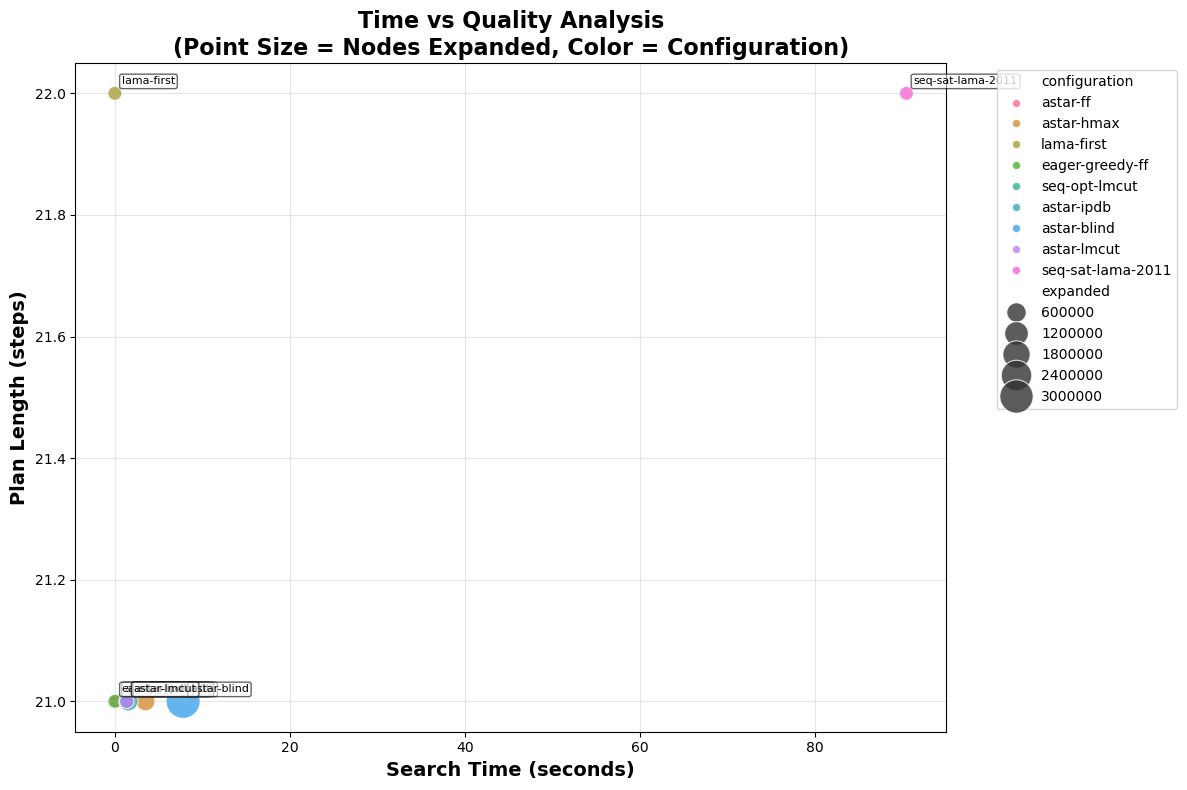


TIME vs QUALITY ANALYSIS

🏆 PARETO OPTIMAL CONFIGURATIONS:
   (Not dominated by any other configuration in time+quality)
   • eager-greedy-ff: 0.006s, 21 steps

📈 CORRELATION ANALYSIS:
   • Search Time vs Plan Length: 0.640
   • Search Time vs Nodes Expanded: -0.100
   • Plan Length vs Nodes Expanded: -0.270
   → Strong correlation between time and quality!



In [34]:
# Create alternative scatterplot using seaborn
plt.figure(figsize=(12, 8))

# Normalize search_time for point sizes
normalized_sizes = 50 + (df['search_time'] - df['search_time'].min()) / (df['search_time'].max() - df['search_time'].min()) * 400

# Create scatterplot with seaborn style
sns.scatterplot(data=df, 
                x='search_time', 
                y='plan_length',
                size='expanded',      # Use expanded nodes as size
                hue='configuration',  # Use configuration as color/hue
                sizes=(100, 600),     # Size range for expanded nodes
                alpha=0.8)

# Customize the plot
plt.xlabel('Search Time (seconds)', fontsize=14, fontweight='bold')
plt.ylabel('Plan Length (steps)', fontsize=14, fontweight='bold')
plt.title('Time vs Quality Analysis\n(Point Size = Nodes Expanded, Color = Configuration)', 
          fontsize=16, fontweight='bold')

# Add configuration labels
for i, row in df.iterrows():
    plt.annotate(row['configuration'], 
                (row['search_time'], row['plan_length']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, ha='left', va='bottom',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.6))

# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Additional analysis for this view
print("\n" + "="*60)
print("TIME vs QUALITY ANALYSIS")
print("="*60)

# Find best time/quality combinations
pareto_optimal = []
for i, row in df.iterrows():
    is_pareto = True
    for j, other in df.iterrows():
        if i != j:
            # Check if other dominates this configuration
            if (other['search_time'] <= row['search_time'] and 
                other['plan_length'] <= row['plan_length'] and
                (other['search_time'] < row['search_time'] or other['plan_length'] < row['plan_length'])):
                is_pareto = False
                break
    if is_pareto:
        pareto_optimal.append(row['configuration'])

print(f"\n🏆 PARETO OPTIMAL CONFIGURATIONS:")
print(f"   (Not dominated by any other configuration in time+quality)")
for config in pareto_optimal:
    row = df[df['configuration'] == config].iloc[0]
    print(f"   • {config}: {row['search_time']:.3f}s, {row['plan_length']} steps")

print(f"\n📈 CORRELATION ANALYSIS:")
time_quality_corr = df['search_time'].corr(df['plan_length'])
time_effort_corr = df['search_time'].corr(df['expanded'])
quality_effort_corr = df['plan_length'].corr(df['expanded'])

print(f"   • Search Time vs Plan Length: {time_quality_corr:.3f}")
print(f"   • Search Time vs Nodes Expanded: {time_effort_corr:.3f}")
print(f"   • Plan Length vs Nodes Expanded: {quality_effort_corr:.3f}")

if abs(time_quality_corr) > 0.5:
    print(f"   → Strong correlation between time and quality!")
else:
    print(f"   → Time and quality are relatively independent")

print("\n" + "="*60)


/var/folders/j2/vvskl4ld08n8851h8c10_lcm0000gn/T/ipykernel_11422/3140079664.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/andreadecarlo/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


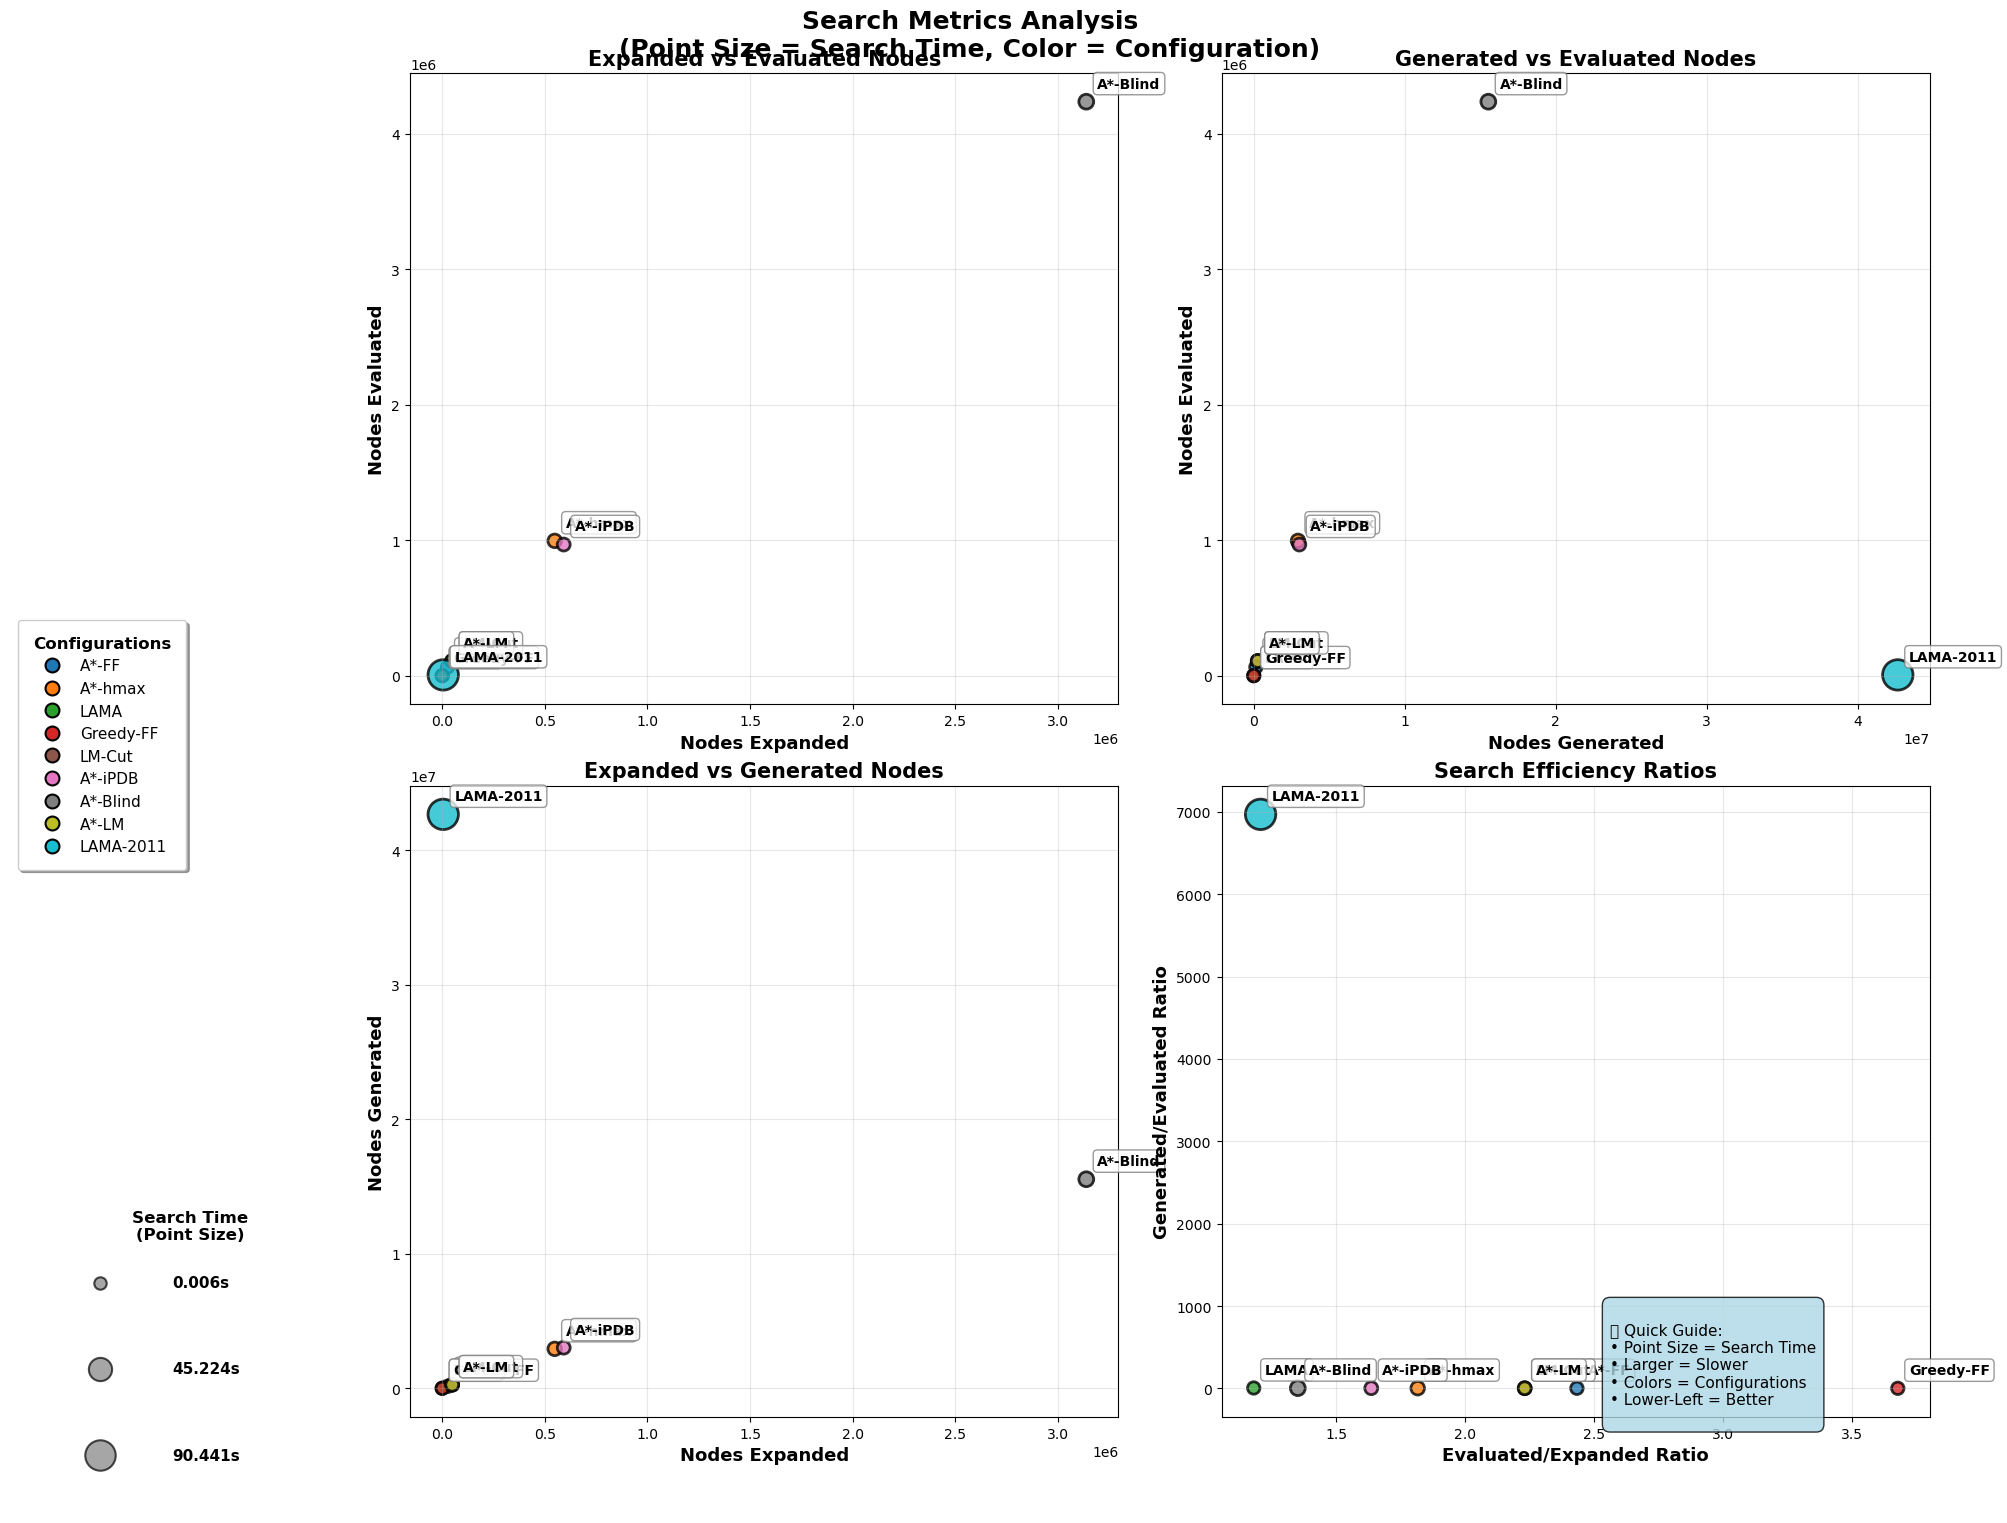


CONFIGURATION NAME MAPPING
  A*-FF        ← astar-ff
  A*-hmax      ← astar-hmax
  LAMA         ← lama-first
  Greedy-FF    ← eager-greedy-ff
  LM-Cut       ← seq-opt-lmcut
  A*-iPDB      ← astar-ipdb
  A*-Blind     ← astar-blind
  A*-LM        ← astar-lmcut
  LAMA-2011    ← seq-sat-lama-2011

SEARCH METRICS DETAILED ANALYSIS

📊 SEARCH EFFICIENCY METRICS:

🔍 EXPANSION EFFICIENCY (Evaluated/Expanded - higher is better):
   4. eager-greedy-ff: 3.68 (537 eval / 146 exp)
   1. astar-ff: 2.43 (64,055 eval / 26,327 exp)
   5. seq-opt-lmcut: 2.23 (108,860 eval / 48,807 exp)

🎯 GENERATION EFFICIENCY (Evaluated/Generated - higher is better):
   4. eager-greedy-ff: 0.61 (537 eval / 881 gen)
   1. astar-ff: 0.44 (64,055 eval / 146,763 gen)
   5. seq-opt-lmcut: 0.41 (108,860 eval / 264,943 gen)

⚡ OVERALL SEARCH EFFICIENCY (Expanded/Generated - higher is better):
   7. astar-blind: 0.20 (3,138,433 exp / 15,539,253 gen)
   6. astar-ipdb: 0.20 (592,193 exp / 3,021,084 gen)
   2. astar-hmax: 0.19 (5

In [35]:
# Create comprehensive search metrics analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Search Metrics Analysis\n(Point Size = Search Time, Color = Configuration)', 
             fontsize=18, fontweight='bold', y=0.96)

# Create readable abbreviations for configurations
def create_readable_name(config_name):
    """Create readable abbreviations for configuration names"""
    name_mapping = {
        'astar-ff': 'A*-FF',
        'astar-hmax': 'A*-hmax',
        'lama-first': 'LAMA',
        'eager-greedy-ff': 'Greedy-FF',
        'seq-opt-lmcut': 'LM-Cut',
        'astar-ipdb': 'A*-iPDB',
        'astar-blind': 'A*-Blind',
        'astar-lmcut': 'A*-LM',
        'seq-sat-lama-2011': 'LAMA-2011'
    }
    return name_mapping.get(config_name, config_name)

# Add readable names to dataframe
df_display = df.copy()
df_display['readable_name'] = df_display['configuration'].apply(create_readable_name)

# Normalize search_time for consistent point sizes across all plots
min_time = df['search_time'].min()
max_time = df['search_time'].max()
normalized_sizes = 80 + (df['search_time'] - min_time) / (max_time - min_time) * 400

# Generate distinct colors for each configuration using tab10 colormap
colors = plt.cm.tab10(np.linspace(0, 1, len(df)))

# Plot 1: Expanded vs Evaluated
scatter1 = ax1.scatter(df['expanded'], df['evaluated'], 
                      s=normalized_sizes, 
                      c=colors, 
                      alpha=0.8, 
                      edgecolors='black', 
                      linewidth=2)

ax1.set_xlabel('Nodes Expanded', fontsize=13, fontweight='bold')
ax1.set_ylabel('Nodes Evaluated', fontsize=13, fontweight='bold')
ax1.set_title('Expanded vs Evaluated Nodes', fontsize=15, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add improved labels for configurations
for i, row in df_display.iterrows():
    ax1.annotate(row['readable_name'], 
                (row['expanded'], row['evaluated']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=10, ha='left', va='bottom', fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                         alpha=0.8, edgecolor='gray', linewidth=1))

# Plot 2: Generated vs Evaluated
scatter2 = ax2.scatter(df['generated'], df['evaluated'], 
                      s=normalized_sizes, 
                      c=colors, 
                      alpha=0.8, 
                      edgecolors='black', 
                      linewidth=2)

ax2.set_xlabel('Nodes Generated', fontsize=13, fontweight='bold')
ax2.set_ylabel('Nodes Evaluated', fontsize=13, fontweight='bold')
ax2.set_title('Generated vs Evaluated Nodes', fontsize=15, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add improved labels
for i, row in df_display.iterrows():
    ax2.annotate(row['readable_name'], 
                (row['generated'], row['evaluated']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=10, ha='left', va='bottom', fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                         alpha=0.8, edgecolor='gray', linewidth=1))

# Plot 3: Expanded vs Generated
scatter3 = ax3.scatter(df['expanded'], df['generated'], 
                      s=normalized_sizes, 
                      c=colors, 
                      alpha=0.8, 
                      edgecolors='black', 
                      linewidth=2)

ax3.set_xlabel('Nodes Expanded', fontsize=13, fontweight='bold')
ax3.set_ylabel('Nodes Generated', fontsize=13, fontweight='bold')
ax3.set_title('Expanded vs Generated Nodes', fontsize=15, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add improved labels
for i, row in df_display.iterrows():
    ax3.annotate(row['readable_name'], 
                (row['expanded'], row['generated']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=10, ha='left', va='bottom', fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                         alpha=0.8, edgecolor='gray', linewidth=1))

# Plot 4: Search Efficiency Ratios
df_ratios = df_display.copy()
df_ratios['eval_expand_ratio'] = df['evaluated'] / df['expanded']
df_ratios['gen_eval_ratio'] = df['generated'] / df['evaluated']

scatter4 = ax4.scatter(df_ratios['eval_expand_ratio'], df_ratios['gen_eval_ratio'], 
                      s=normalized_sizes, 
                      c=colors, 
                      alpha=0.8, 
                      edgecolors='black', 
                      linewidth=2)

ax4.set_xlabel('Evaluated/Expanded Ratio', fontsize=13, fontweight='bold')
ax4.set_ylabel('Generated/Evaluated Ratio', fontsize=13, fontweight='bold')
ax4.set_title('Search Efficiency Ratios', fontsize=15, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Add improved labels
for i, row in df_ratios.iterrows():
    ax4.annotate(row['readable_name'], 
                (row['eval_expand_ratio'], row['gen_eval_ratio']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=10, ha='left', va='bottom', fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                         alpha=0.8, edgecolor='gray', linewidth=1))

# Create improved legend with readable names
legend_elements = []
for i, (config, readable) in enumerate(zip(df['configuration'], df_display['readable_name'])):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                    markerfacecolor=colors[i], markersize=10, 
                                    label=f'{readable}', markeredgecolor='black',
                                    markeredgewidth=1.5))

# Position legend better
config_legend = fig.legend(handles=legend_elements, 
                          title='Configurations', 
                          loc='center left', 
                          bbox_to_anchor=(0.02, 0.5), 
                          fontsize=11, 
                          title_fontsize=12,
                          frameon=True, 
                          fancybox=True, 
                          shadow=True,
                          borderpad=1)
config_legend.get_title().set_fontweight('bold')

# Improved size legend
size_legend_ax = fig.add_axes([0.02, 0.02, 0.18, 0.18])
size_legend_ax.set_xlim(0, 1)
size_legend_ax.set_ylim(0, 1)
size_legend_ax.axis('off')

size_values = [min_time, (min_time + max_time) / 2, max_time]
size_points = [80, 280, 480]
y_positions = [0.8, 0.5, 0.2]

for size_val, size_pt, y_pos in zip(size_values, size_points, y_positions):
    size_legend_ax.scatter(0.25, y_pos, s=size_pt, c='gray', alpha=0.7, 
                          edgecolors='black', linewidth=1.5)
    size_legend_ax.text(0.45, y_pos, f'{size_val:.3f}s', va='center', fontsize=11, fontweight='bold')

size_legend_ax.text(0.5, 0.95, 'Search Time\n(Point Size)', ha='center', fontsize=12, fontweight='bold')

# Add summary text box
summary_text = f"""
📊 Quick Guide:
• Point Size = Search Time
• Larger = Slower
• Colors = Configurations
• Lower-Left = Better
"""

fig.text(0.82, 0.15, summary_text, fontsize=11, 
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8),
         verticalalignment='top')

plt.tight_layout()
plt.subplots_adjust(left=0.22, bottom=0.08, right=0.98, top=0.92)
plt.show()

# Print configuration mapping for reference
print("\n" + "="*60)
print("CONFIGURATION NAME MAPPING")
print("="*60)
for orig, readable in zip(df['configuration'], df_display['readable_name']):
    print(f"  {readable:12} ← {orig}")
print("="*60)

# Detailed analysis of search metrics
print("\n" + "="*80)
print("SEARCH METRICS DETAILED ANALYSIS")
print("="*80)

# Calculate efficiency metrics
print(f"\n📊 SEARCH EFFICIENCY METRICS:")
df_analysis = df.copy()
df_analysis['expansion_efficiency'] = df_analysis['evaluated'] / df_analysis['expanded']
df_analysis['generation_efficiency'] = df_analysis['evaluated'] / df_analysis['generated'] 
df_analysis['total_efficiency'] = df_analysis['expanded'] / df_analysis['generated']

print(f"\n🔍 EXPANSION EFFICIENCY (Evaluated/Expanded - higher is better):")
expansion_sorted = df_analysis.sort_values('expansion_efficiency', ascending=False)
for i, row in expansion_sorted.head(3).iterrows():
    print(f"   {i+1}. {row['configuration']}: {row['expansion_efficiency']:.2f} ({row['evaluated']:,} eval / {row['expanded']:,} exp)")

print(f"\n🎯 GENERATION EFFICIENCY (Evaluated/Generated - higher is better):")
generation_sorted = df_analysis.sort_values('generation_efficiency', ascending=False)
for i, row in generation_sorted.head(3).iterrows():
    print(f"   {i+1}. {row['configuration']}: {row['generation_efficiency']:.2f} ({row['evaluated']:,} eval / {row['generated']:,} gen)")

print(f"\n⚡ OVERALL SEARCH EFFICIENCY (Expanded/Generated - higher is better):")
total_sorted = df_analysis.sort_values('total_efficiency', ascending=False)
for i, row in total_sorted.head(3).iterrows():
    print(f"   {i+1}. {row['configuration']}: {row['total_efficiency']:.2f} ({row['expanded']:,} exp / {row['generated']:,} gen)")

print(f"\n📈 CORRELATION ANALYSIS:")
corr_expanded_evaluated = df['expanded'].corr(df['evaluated'])
corr_generated_evaluated = df['generated'].corr(df['evaluated'])
corr_expanded_generated = df['expanded'].corr(df['generated'])
corr_time_expanded = df['search_time'].corr(df['expanded'])

print(f"   • Expanded vs Evaluated: {corr_expanded_evaluated:.3f}")
print(f"   • Generated vs Evaluated: {corr_generated_evaluated:.3f}")
print(f"   • Expanded vs Generated: {corr_expanded_generated:.3f}")
print(f"   • Search Time vs Expanded: {corr_time_expanded:.3f}")

# Find outliers and interesting patterns
print(f"\n🎯 INTERESTING PATTERNS:")

# Find configurations with unusual ratios
high_eval_expand = df_analysis[df_analysis['expansion_efficiency'] > df_analysis['expansion_efficiency'].quantile(0.75)]
low_eval_expand = df_analysis[df_analysis['expansion_efficiency'] < df_analysis['expansion_efficiency'].quantile(0.25)]

if not high_eval_expand.empty:
    print(f"   • High Evaluation Efficiency: {list(high_eval_expand['configuration'])}")
if not low_eval_expand.empty:
    print(f"   • Low Evaluation Efficiency: {list(low_eval_expand['configuration'])}")

# Time vs node relationship
fastest_config = df_analysis.loc[df_analysis['search_time'].idxmin()]
most_nodes = df_analysis.loc[df_analysis['expanded'].idxmax()]

print(f"\n⏱️ TIME vs SEARCH EFFORT:")
print(f"   • Fastest: {fastest_config['configuration']} ({fastest_config['search_time']:.3f}s, {fastest_config['expanded']:,} nodes)")
print(f"   • Most nodes: {most_nodes['configuration']} ({most_nodes['search_time']:.3f}s, {most_nodes['expanded']:,} nodes)")

if fastest_config.name != most_nodes.name:
    efficiency_diff = most_nodes['search_time'] / fastest_config['search_time']
    nodes_diff = most_nodes['expanded'] / fastest_config['expanded']
    print(f"   • Time difference: {efficiency_diff:.1f}x, Node difference: {nodes_diff:.1f}x")

print("\n" + "="*80)


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('configuration_comparison.csv')
print("Configuration Comparison Data:")
print(df.head())
print(f"\nDataset shape: {df.shape}")


Configuration Comparison Data:
     configuration problem  plan_length  expanded  evaluated  generated  \
0         astar-ff      pb           21     26327      64055     146763   
1       astar-hmax      pb           21    548360     995445    2933506   
2       lama-first      pb           22       458        540       2969   
3  eager-greedy-ff      pb           21       146        537        881   
4    seq-opt-lmcut      pb           21     48807     108860     264943   

   search_time  memory_mb  exit_code  
0     0.256567        NaN          0  
1     3.503490        NaN          0  
2     0.008715        NaN          0  
3     0.006166        NaN          0  
4     1.374834        NaN          0  

Dataset shape: (9, 9)


In [37]:
# Display basic statistics
print("Summary Statistics:")
print(df.describe())

print("\nConfiguration types:")
print(df['configuration'].tolist())


Summary Statistics:
       plan_length      expanded     evaluated     generated  search_time  \
count     9.000000  9.000000e+00  9.000000e+00  9.000000e+00     9.000000   
mean     21.222222  4.898452e+05  7.210948e+05  7.203475e+06    11.811597   
std       0.440959  1.021463e+06  1.379758e+06  1.419492e+07    29.587567   
min      21.000000  1.460000e+02  5.370000e+02  8.810000e+02     0.006166   
25%      21.000000  5.076000e+03  6.120000e+03  1.467630e+05     0.256567   
50%      21.000000  4.880700e+04  1.088600e+05  2.649430e+05     1.374834   
75%      21.000000  5.483600e+05  9.683020e+05  3.021084e+06     3.503490   
max      22.000000  3.138433e+06  4.237134e+06  4.265694e+07    90.441390   

       memory_mb  exit_code  
count        0.0        9.0  
mean         NaN        0.0  
std          NaN        0.0  
min          NaN        0.0  
25%          NaN        0.0  
50%          NaN        0.0  
75%          NaN        0.0  
max          NaN        0.0  

Configuration t

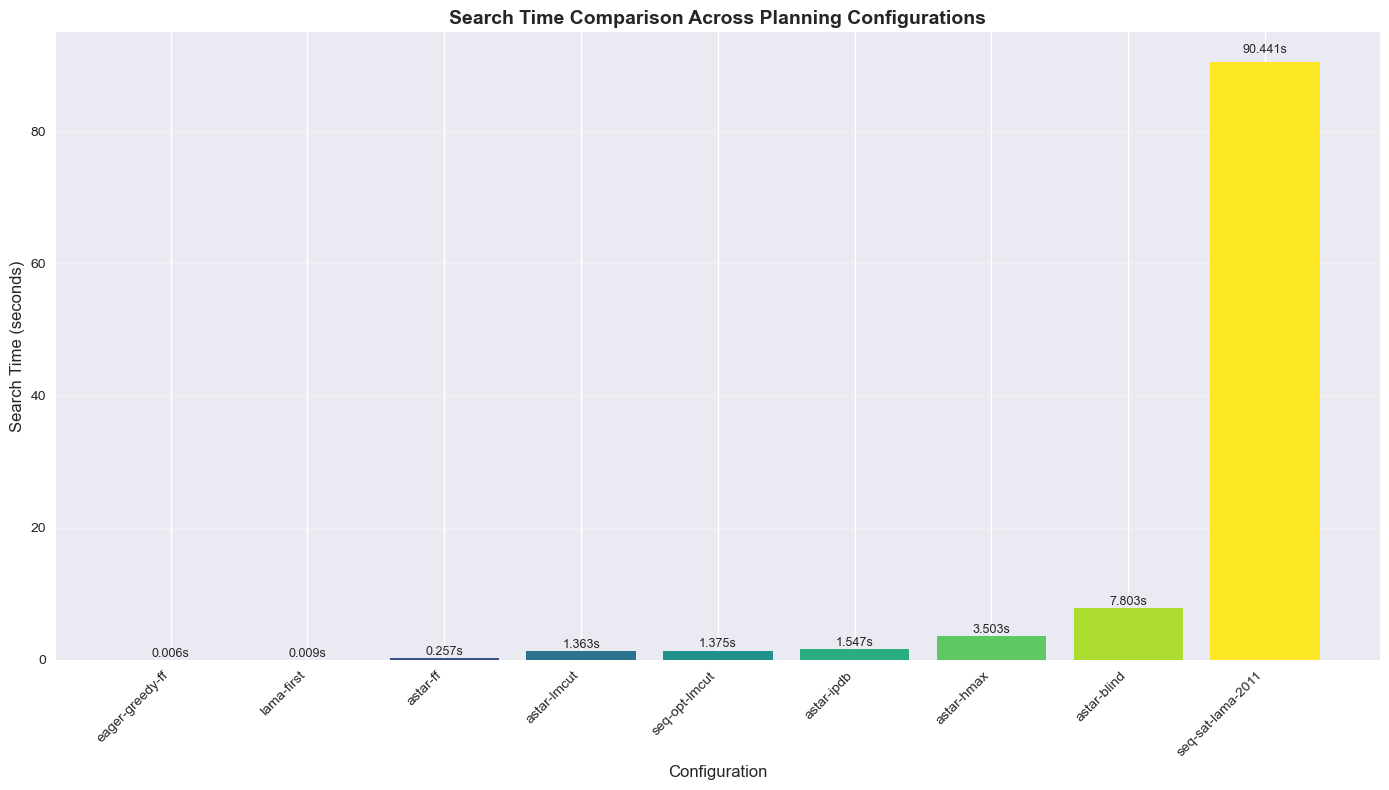

Fastest: eager-greedy-ff (0.006s)
Slowest: seq-sat-lama-2011 (90.441s)
Speed difference: 14667.8x


In [38]:
# Plot search time comparison
plt.figure(figsize=(14, 8))

# Sort by search time for better visualization
df_sorted = df.sort_values('search_time')

bars = plt.bar(range(len(df_sorted)), df_sorted['search_time'], 
               color=plt.cm.viridis(np.linspace(0, 1, len(df_sorted))))

plt.xlabel('Configuration', fontsize=12)
plt.ylabel('Search Time (seconds)', fontsize=12)
plt.title('Search Time Comparison Across Planning Configurations', fontsize=14, fontweight='bold')
plt.xticks(range(len(df_sorted)), df_sorted['configuration'], rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{height:.3f}s', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

# Print fastest and slowest
fastest = df_sorted.iloc[0]
slowest = df_sorted.iloc[-1]
print(f"Fastest: {fastest['configuration']} ({fastest['search_time']:.3f}s)")
print(f"Slowest: {slowest['configuration']} ({slowest['search_time']:.3f}s)")
print(f"Speed difference: {slowest['search_time']/fastest['search_time']:.1f}x")


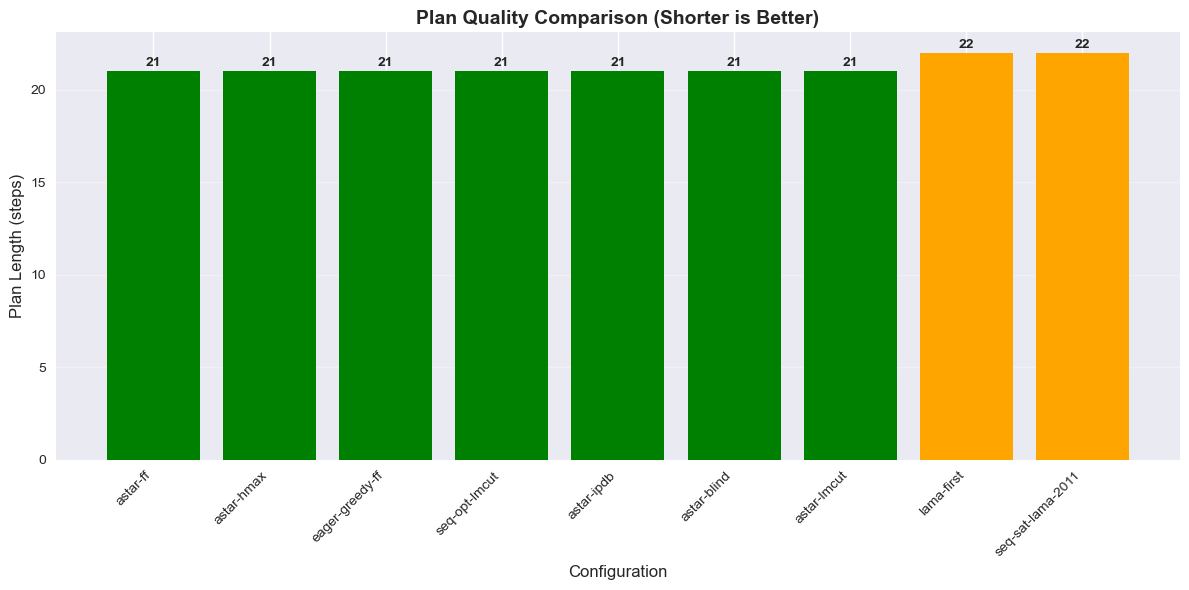

Optimal plan length: 21 steps
Configurations achieving optimal length: ['astar-ff', 'astar-hmax', 'eager-greedy-ff', 'seq-opt-lmcut', 'astar-ipdb', 'astar-blind', 'astar-lmcut']


In [39]:
# Plot plan length comparison
plt.figure(figsize=(12, 6))

# Sort by plan length
df_plan_sorted = df.sort_values('plan_length')

bars = plt.bar(range(len(df_plan_sorted)), df_plan_sorted['plan_length'],
               color=['green' if x == df_plan_sorted['plan_length'].min() else 'orange' 
                      for x in df_plan_sorted['plan_length']])

plt.xlabel('Configuration', fontsize=12)
plt.ylabel('Plan Length (steps)', fontsize=12)
plt.title('Plan Quality Comparison (Shorter is Better)', fontsize=14, fontweight='bold')
plt.xticks(range(len(df_plan_sorted)), df_plan_sorted['configuration'], rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

# Analyze plan quality
optimal_length = df['plan_length'].min()
optimal_configs = df[df['plan_length'] == optimal_length]['configuration'].tolist()
print(f"Optimal plan length: {optimal_length} steps")
print(f"Configurations achieving optimal length: {optimal_configs}")


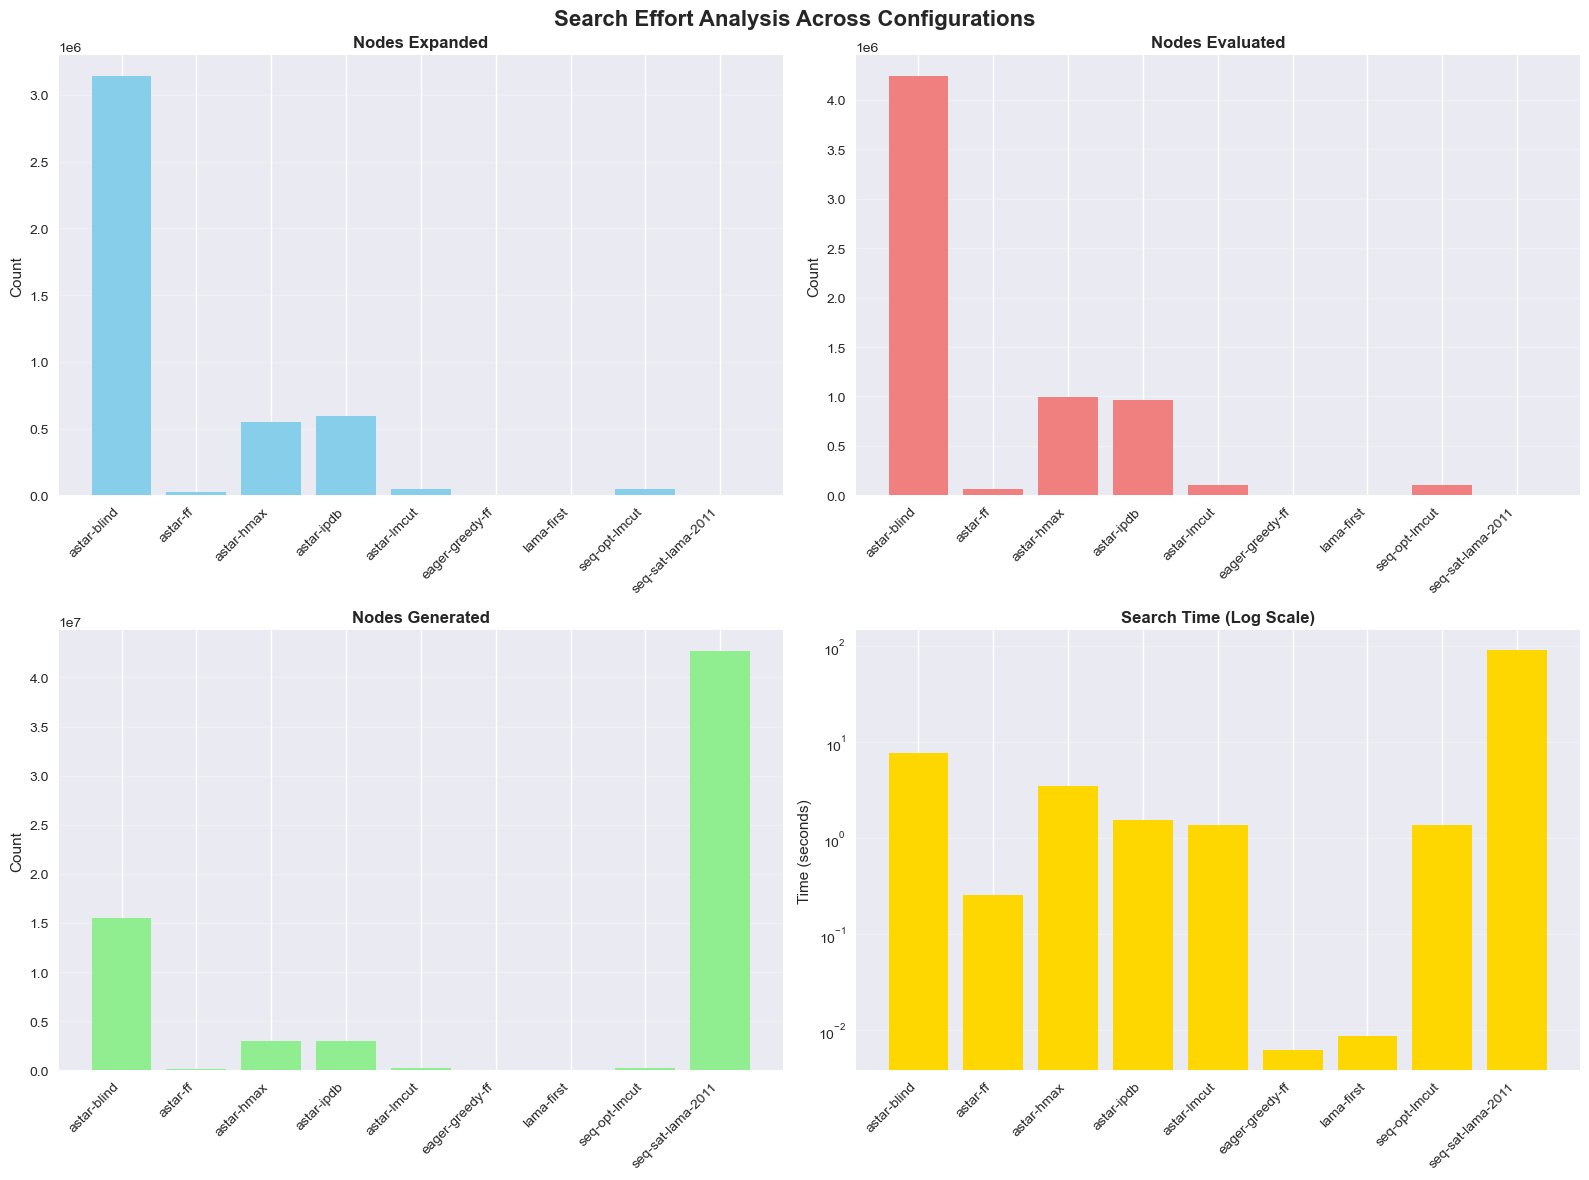

In [40]:
# Create a multi-metric comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Search Effort Analysis Across Configurations', fontsize=16, fontweight='bold')

# Sort by configuration name for consistent ordering
df_sorted_name = df.sort_values('configuration')

# 1. Nodes Expanded
axes[0,0].bar(range(len(df_sorted_name)), df_sorted_name['expanded'], color='skyblue')
axes[0,0].set_title('Nodes Expanded', fontweight='bold')
axes[0,0].set_xticks(range(len(df_sorted_name)))
axes[0,0].set_xticklabels(df_sorted_name['configuration'], rotation=45, ha='right')
axes[0,0].set_ylabel('Count')
axes[0,0].grid(axis='y', alpha=0.3)

# 2. Nodes Evaluated
axes[0,1].bar(range(len(df_sorted_name)), df_sorted_name['evaluated'], color='lightcoral')
axes[0,1].set_title('Nodes Evaluated', fontweight='bold')
axes[0,1].set_xticks(range(len(df_sorted_name)))
axes[0,1].set_xticklabels(df_sorted_name['configuration'], rotation=45, ha='right')
axes[0,1].set_ylabel('Count')
axes[0,1].grid(axis='y', alpha=0.3)

# 3. Nodes Generated
axes[1,0].bar(range(len(df_sorted_name)), df_sorted_name['generated'], color='lightgreen')
axes[1,0].set_title('Nodes Generated', fontweight='bold')
axes[1,0].set_xticks(range(len(df_sorted_name)))
axes[1,0].set_xticklabels(df_sorted_name['configuration'], rotation=45, ha='right')
axes[1,0].set_ylabel('Count')
axes[1,0].grid(axis='y', alpha=0.3)

# 4. Search Time (log scale)
axes[1,1].bar(range(len(df_sorted_name)), df_sorted_name['search_time'], color='gold')
axes[1,1].set_title('Search Time (Log Scale)', fontweight='bold')
axes[1,1].set_xticks(range(len(df_sorted_name)))
axes[1,1].set_xticklabels(df_sorted_name['configuration'], rotation=45, ha='right')
axes[1,1].set_ylabel('Time (seconds)')
axes[1,1].set_yscale('log')
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


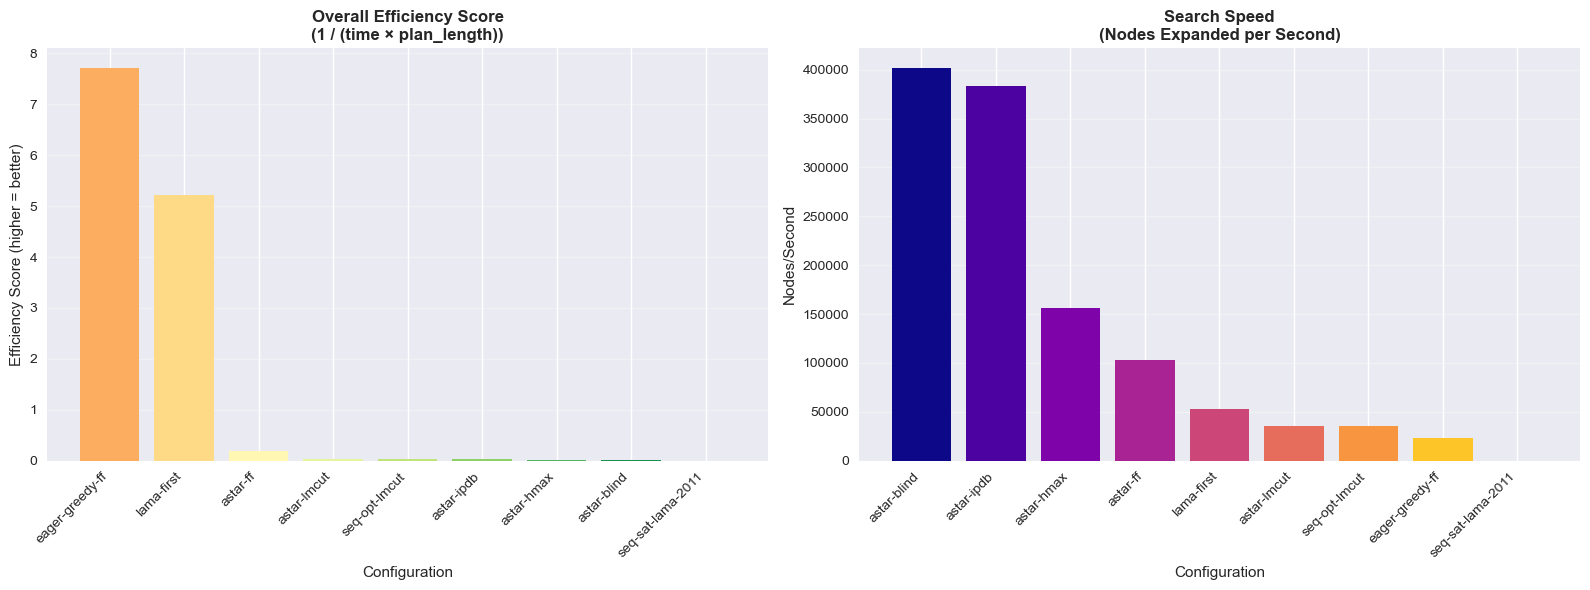


Efficiency Rankings:

Top 3 by Overall Efficiency:
eager-greedy-ff: 7.7228
lama-first: 5.2157
astar-ff: 0.1856

Top 3 by Search Speed (nodes/sec):
astar-blind: 402193 nodes/sec
astar-ipdb: 382912 nodes/sec
astar-hmax: 156518 nodes/sec


In [41]:
# Calculate efficiency metrics
df_analysis = df.copy()
df_analysis['efficiency_score'] = 1 / (df_analysis['search_time'] * df_analysis['plan_length'])
df_analysis['nodes_per_second'] = df_analysis['expanded'] / df_analysis['search_time']

# Create efficiency plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Efficiency Score (higher is better)
df_eff_sorted = df_analysis.sort_values('efficiency_score', ascending=False)
bars1 = ax1.bar(range(len(df_eff_sorted)), df_eff_sorted['efficiency_score'], 
                color=plt.cm.RdYlGn(np.linspace(0.3, 1, len(df_eff_sorted))))
ax1.set_title('Overall Efficiency Score\n(1 / (time × plan_length))', fontweight='bold')
ax1.set_xlabel('Configuration')
ax1.set_ylabel('Efficiency Score (higher = better)')
ax1.set_xticks(range(len(df_eff_sorted)))
ax1.set_xticklabels(df_eff_sorted['configuration'], rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Nodes per second
df_nps_sorted = df_analysis.sort_values('nodes_per_second', ascending=False)
bars2 = ax2.bar(range(len(df_nps_sorted)), df_nps_sorted['nodes_per_second'],
                color=plt.cm.plasma(np.linspace(0, 1, len(df_nps_sorted))))
ax2.set_title('Search Speed\n(Nodes Expanded per Second)', fontweight='bold')
ax2.set_xlabel('Configuration')
ax2.set_ylabel('Nodes/Second')
ax2.set_xticks(range(len(df_nps_sorted)))
ax2.set_xticklabels(df_nps_sorted['configuration'], rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nEfficiency Rankings:")
print("\nTop 3 by Overall Efficiency:")
for i, row in df_eff_sorted.head(3).iterrows():
    print(f"{row['configuration']}: {row['efficiency_score']:.4f}")

print("\nTop 3 by Search Speed (nodes/sec):")
for i, row in df_nps_sorted.head(3).iterrows():
    print(f"{row['configuration']}: {row['nodes_per_second']:.0f} nodes/sec")


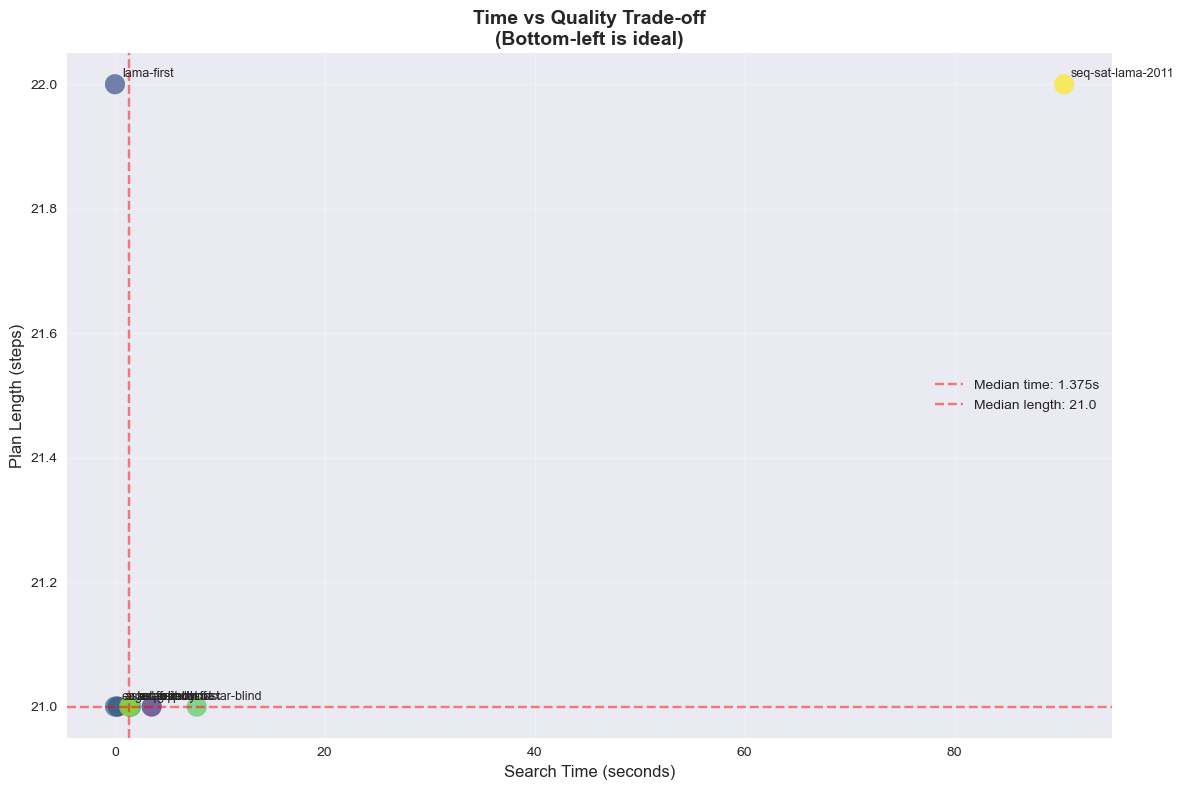


Configuration Categories:
Fast & Optimal: ['astar-ff', 'eager-greedy-ff', 'astar-lmcut']
Fast & Suboptimal: ['lama-first']
Slow & Optimal: ['astar-hmax', 'seq-opt-lmcut', 'astar-ipdb', 'astar-blind']


In [42]:
# Scatter plot: time vs plan quality
plt.figure(figsize=(12, 8))

# Create scatter plot
scatter = plt.scatter(df['search_time'], df['plan_length'], 
                     s=200, alpha=0.7, c=range(len(df)), cmap='viridis')

# Add configuration labels
for i, row in df.iterrows():
    plt.annotate(row['configuration'], 
                (row['search_time'], row['plan_length']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, ha='left')

plt.xlabel('Search Time (seconds)', fontsize=12)
plt.ylabel('Plan Length (steps)', fontsize=12)
plt.title('Time vs Quality Trade-off\n(Bottom-left is ideal)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add quadrant lines
median_time = df['search_time'].median()
median_length = df['plan_length'].median()
plt.axvline(median_time, color='red', linestyle='--', alpha=0.5, label=f'Median time: {median_time:.3f}s')
plt.axhline(median_length, color='red', linestyle='--', alpha=0.5, label=f'Median length: {median_length}')

plt.legend()
plt.tight_layout()
plt.show()

# Identify best trade-offs
print("\nConfiguration Categories:")
fast_optimal = df[(df['search_time'] < median_time) & (df['plan_length'] <= df['plan_length'].min())]
if not fast_optimal.empty:
    print(f"Fast & Optimal: {fast_optimal['configuration'].tolist()}")
else:
    print("Fast & Optimal: None")

fast_subopt = df[(df['search_time'] < median_time) & (df['plan_length'] > df['plan_length'].min())]
if not fast_subopt.empty:
    print(f"Fast & Suboptimal: {fast_subopt['configuration'].tolist()}")

slow_optimal = df[(df['search_time'] >= median_time) & (df['plan_length'] <= df['plan_length'].min())]
if not slow_optimal.empty:
    print(f"Slow & Optimal: {slow_optimal['configuration'].tolist()}")


In [43]:
# Generate summary recommendations
print("=" * 60)
print("CONFIGURATION ANALYSIS SUMMARY")
print("=" * 60)

# Find best configurations for different criteria
fastest_config = df.loc[df['search_time'].idxmin()]
shortest_plan = df.loc[df['plan_length'].idxmin()]
most_efficient = df_analysis.loc[df_analysis['efficiency_score'].idxmax()]

print(f"\n🏃 FASTEST CONFIGURATION:")
print(f"   {fastest_config['configuration']} - {fastest_config['search_time']:.3f}s")
print(f"   Plan length: {fastest_config['plan_length']} steps")

print(f"\n🎯 BEST PLAN QUALITY:")
optimal_configs = df[df['plan_length'] == df['plan_length'].min()]
for _, config in optimal_configs.iterrows():
    print(f"   {config['configuration']} - {config['plan_length']} steps in {config['search_time']:.3f}s")

print(f"\n⚡ MOST EFFICIENT OVERALL:")
print(f"   {most_efficient['configuration']} - Score: {most_efficient['efficiency_score']:.4f}")
print(f"   ({most_efficient['search_time']:.3f}s, {most_efficient['plan_length']} steps)")

print(f"\n📊 KEY INSIGHTS:")
time_range = df['search_time'].max() / df['search_time'].min()
plan_range = df['plan_length'].max() - df['plan_length'].min()
print(f"   • Time performance varies by {time_range:.1f}x across configurations")
print(f"   • Plan quality difference: {plan_range} steps max")
print(f"   • {len(optimal_configs)} configurations achieve optimal plan length")

print(f"\n💡 RECOMMENDATIONS:")
if fastest_config['plan_length'] == df['plan_length'].min():
    print(f"   • Use {fastest_config['configuration']} - fastest AND optimal!")
else:
    fastest_optimal = optimal_configs.loc[optimal_configs['search_time'].idxmin()]
    print(f"   • For optimal solutions: {fastest_optimal['configuration']} ({fastest_optimal['search_time']:.3f}s)")
    print(f"   • For speed: {fastest_config['configuration']} ({fastest_config['search_time']:.3f}s, +{fastest_config['plan_length'] - df['plan_length'].min()} steps)")

print("\n" + "=" * 60)


CONFIGURATION ANALYSIS SUMMARY

🏃 FASTEST CONFIGURATION:
   eager-greedy-ff - 0.006s
   Plan length: 21 steps

🎯 BEST PLAN QUALITY:
   astar-ff - 21 steps in 0.257s
   astar-hmax - 21 steps in 3.503s
   eager-greedy-ff - 21 steps in 0.006s
   seq-opt-lmcut - 21 steps in 1.375s
   astar-ipdb - 21 steps in 1.547s
   astar-blind - 21 steps in 7.803s
   astar-lmcut - 21 steps in 1.363s

⚡ MOST EFFICIENT OVERALL:
   eager-greedy-ff - Score: 7.7228
   (0.006s, 21 steps)

📊 KEY INSIGHTS:
   • Time performance varies by 14667.8x across configurations
   • Plan quality difference: 1 steps max
   • 7 configurations achieve optimal plan length

💡 RECOMMENDATIONS:
   • Use eager-greedy-ff - fastest AND optimal!

